# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
#Mounting the gdrive
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#... navigating to the folder where the csv is stored.
%cd /gdrive/My Drive/FoodHub Project 1

/gdrive/My Drive/FoodHub Project 1


In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#df.shape, The shape attribute of DataFrame stores the number of rows and columns as a tuple
print(df.shape)

(1898, 9)


#### Observations: There are 1898 rows and 9 columns in this dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 4 integer variables, 1 float variable and 2 object datatype variables.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#Find whether any data is missing using .isnull function
#Sum for each columns using .sum()
missing = df.isnull().sum()
print(missing)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [ ]:
## Installation of missingno libraries using !pip install command
# This is another method to find missing values.
!pip install missingno

In [ ]:
## import libraries for to find missing values.
import missingno as msno

<Axes: >

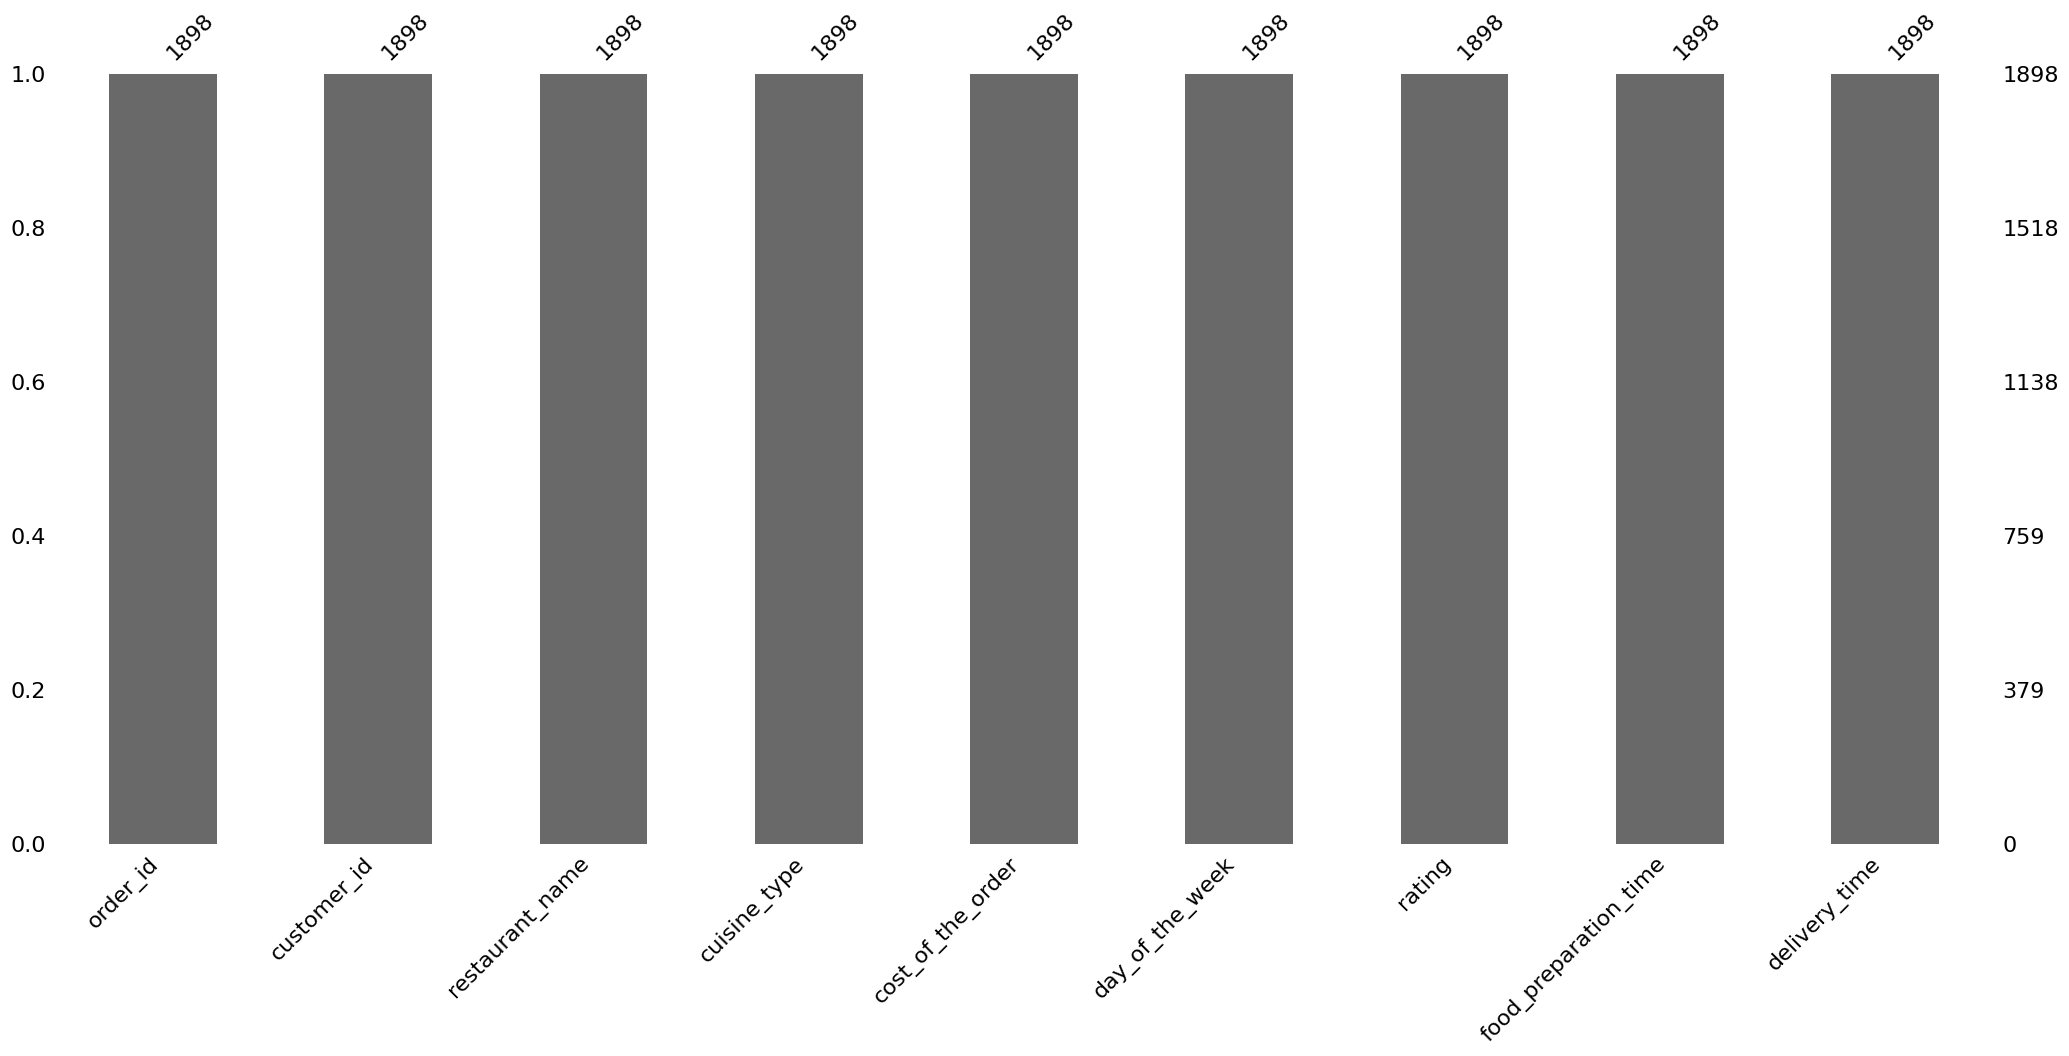

In [ ]:
# Trying to find missing values with a visual representation of the data.
msno.bar(df)

#### **Observations**: The dataset does not have any missing values. In the second method all columns have the same number of values, that means there are no missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#  Statistical summary of the the data is displayed using data.describle() funtion.
## Descriptive statistics include those that summarize
## the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


**Observations**:
Cost of the Order: Average cost of the order is 16.5 dollars and 75 percent of the cost of the order is less than $22.00

Food Preparation Time: Average preparation time is 27 minutes. Maximum time taken to prepare an order is 35 minutes.

Deliver Time: Average time to deliver is around 24 minutes. Almost all the restaurants deliver within 33 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df.head()# to show top few rows of the dataset

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#Selecting all the rows from the given Dataframe that has ratings 'Not Given'
#assigin the filtered data in to a new dataframe. Executing shape command to find the number of rows.
ratings_not_given = df[df['rating'] == 'Not given']
print(ratings_not_given.shape)


(736, 9)


#### Observations:
There are 736 Restaurants that has ratings 'Not given'. This means that out of 1898 total restaurants 736 are not rated in this dataset. 38% of the dataset does not have a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

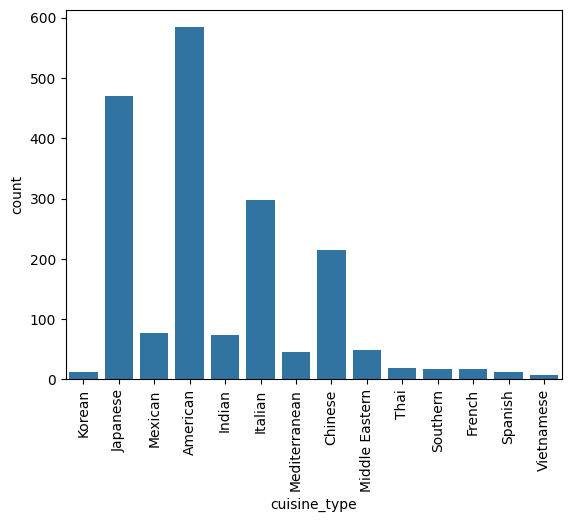

In [ ]:
# Write the code here
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()


## Observation:
* Based on this Histogram we are able to identify that there are more American
  cusines than any other cusines.
* Top 4 cuisines are American, Japanese, Italian and Chinese.

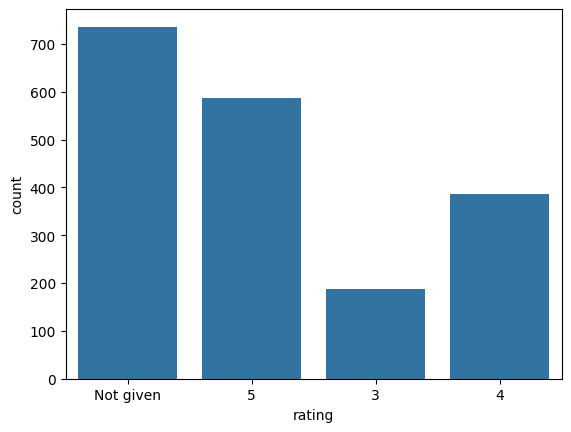

In [ ]:
sns.countplot(data=df,x='rating')
plt.show()

## Observation

*   None of the Restaurants are rated 1 or 2
*   More Restaurants are rated 5 than 3 or 4.



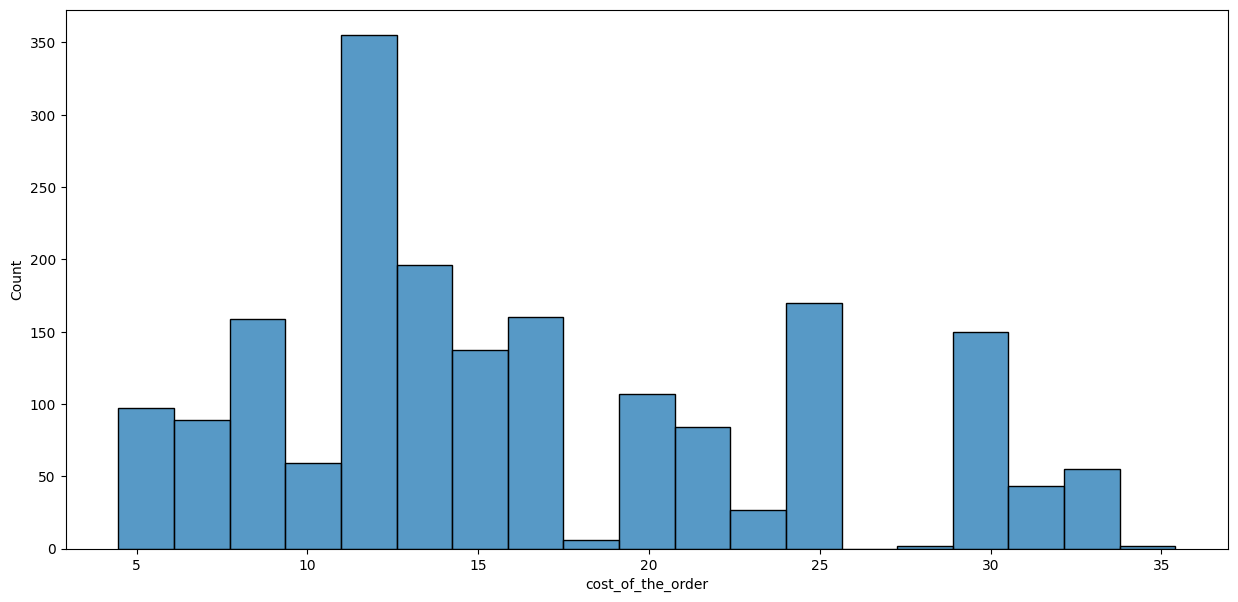

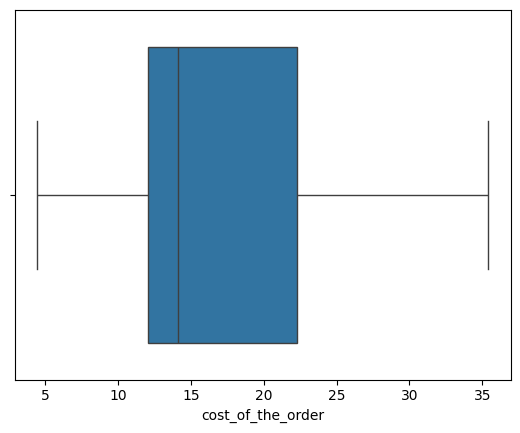

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()


## Observation:



*   Most of the data is concentrated within the range of 5-18.
*   The distribution of the Price is skewed towards the right.
*   There are no outliers in this variable based on the boxplot.







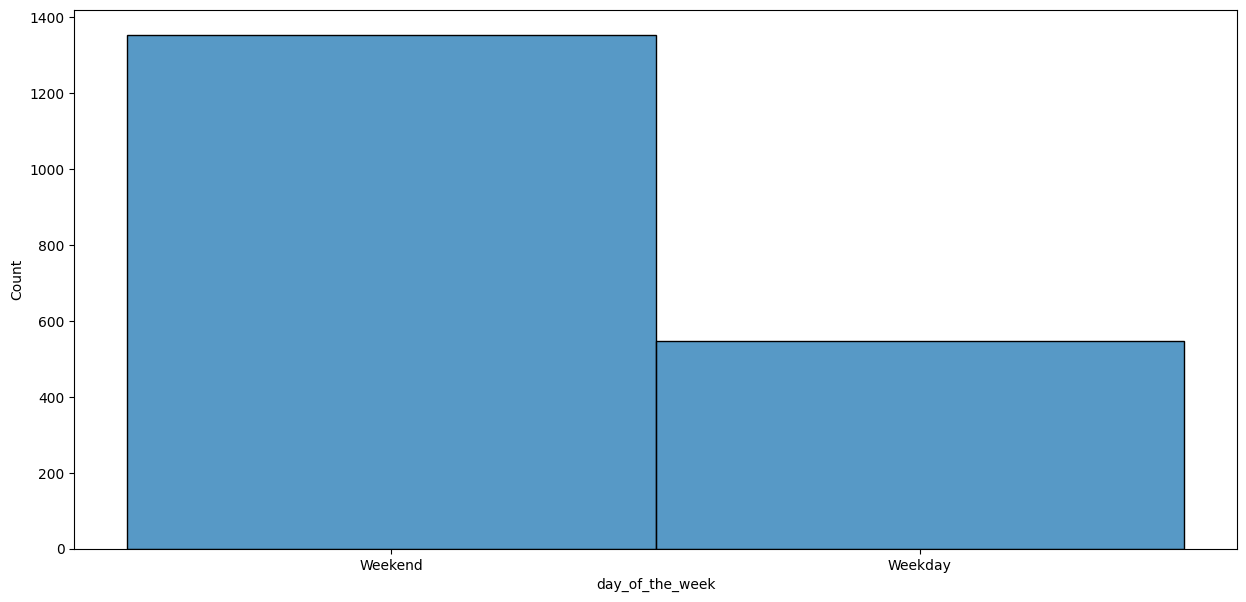

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df,x='day_of_the_week')
plt.show()


***Observation***
*   There are more delivery orders during weekends than during the week days.




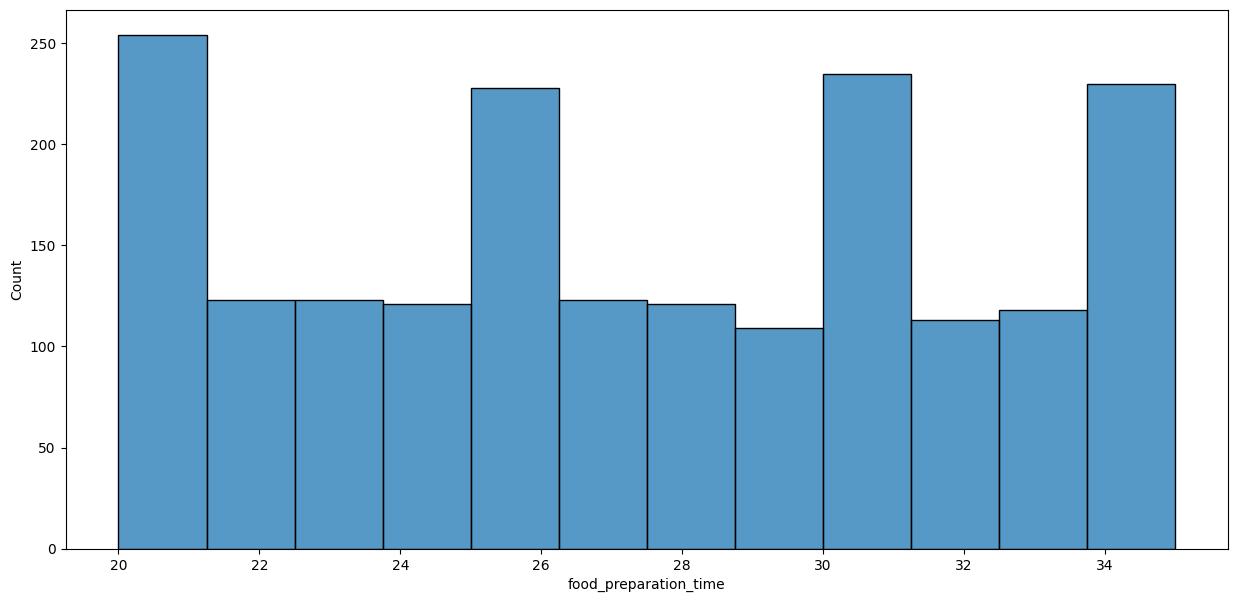

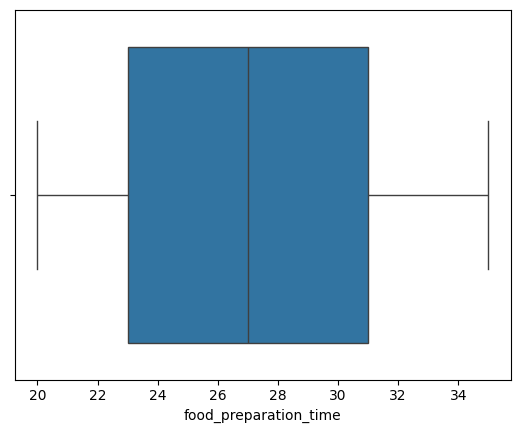

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

**Observation**

*   There are no outliers in this data
*   Almost 250 orders takes less than or equal to 21 minutes to prepare.



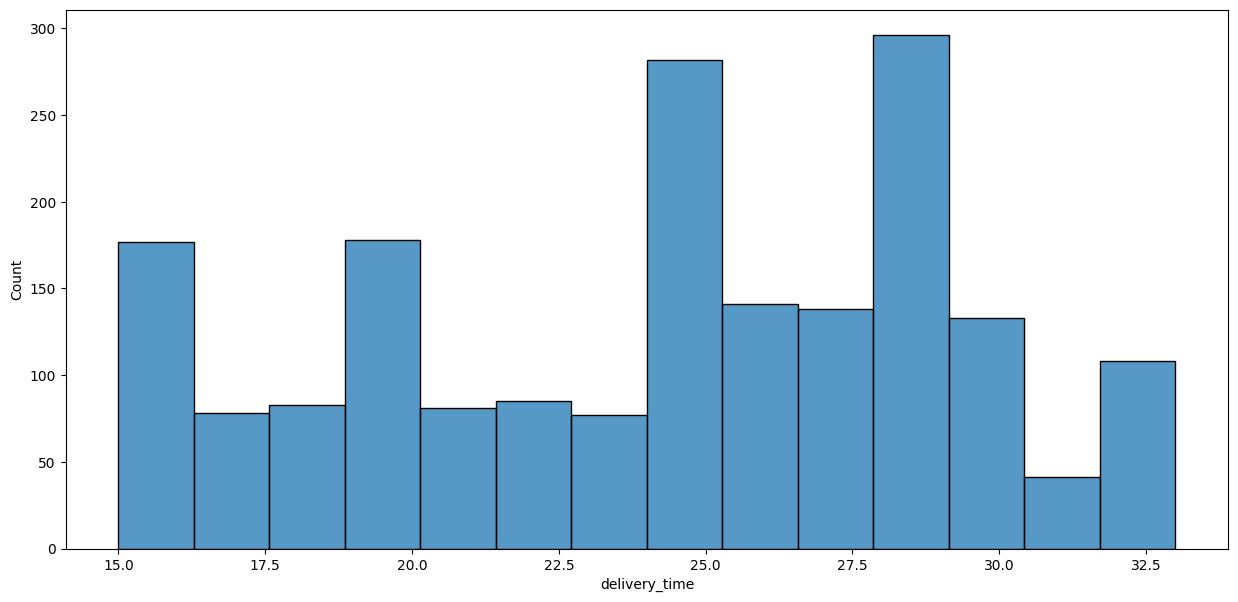

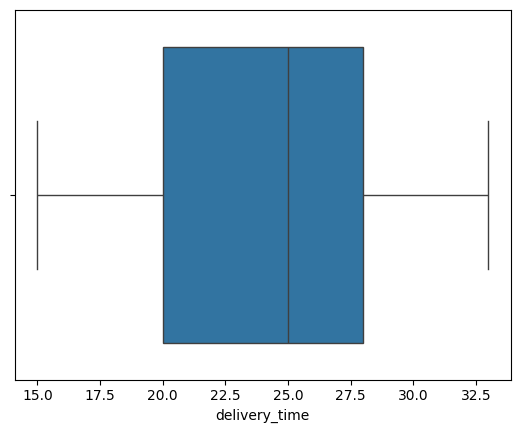

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

***Observation:***

*   There are no outliers in this data set for deliver time.
*   75% of deliveries are completed within 28 minutes.
*   50% of deliveries are completed less than 25 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Counting all the restaurant names that are in the dataset.
# then displaying the top 10, you can also display top 5
top5=df['restaurant_name'].value_counts()
top5.head(10)


restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64

**Observations:**
Top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Shushi, Blue Ribbon Fried Chicken and Parm.

Topping the list is Shake Shak with 219 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Create a data set based on the the day of week, then group and count the records based on cusine type.
popular_in_weekends = df.loc[df['day_of_the_week']=='Weekend','cuisine_type'].value_counts()
popular_in_weekends.head(5)


cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

#### Observations:
*   American Cusine is the most popular cusine during the weekend




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# To find the percent of the orders which cost more than $20.00
percent1 = df.loc[df['cost_of_the_order'] > 20,'cost_of_the_order'].count()/df['cost_of_the_order'].count()
print(percent1)
#top5=df['cost_of_the_order'].value_counts()
#top5.head(10)


0.2924130663856691


#### Observations:
*   29% of order costs more than 20 dollars.





### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# To find Mean
df['delivery_time'].mean()

24.161749209694417

#### Observations:

1.   The medan Order Deliver Time is 24 minutes.





### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
top5=df['customer_id'].value_counts()
top5.head(5)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64

#### Observations:

Customer 52832, 47440 and 83287 are the top 3 customers.

*   The company can give the discount vouchers to these customers.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
#lets add a colum which shows the total time to deliver including the prep time.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
num_cols= ['food_preparation_time','delivery_time','cost_of_the_order','total_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


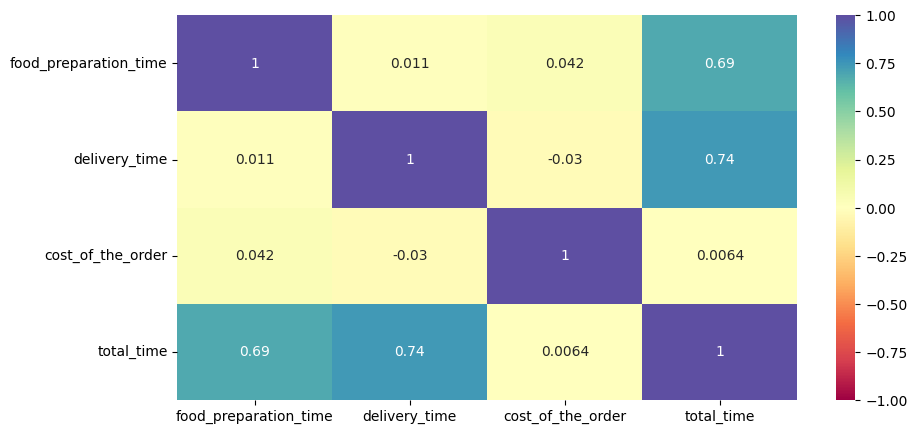

In [ ]:
plt.figure(figsize=(10,5))
corr = df[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

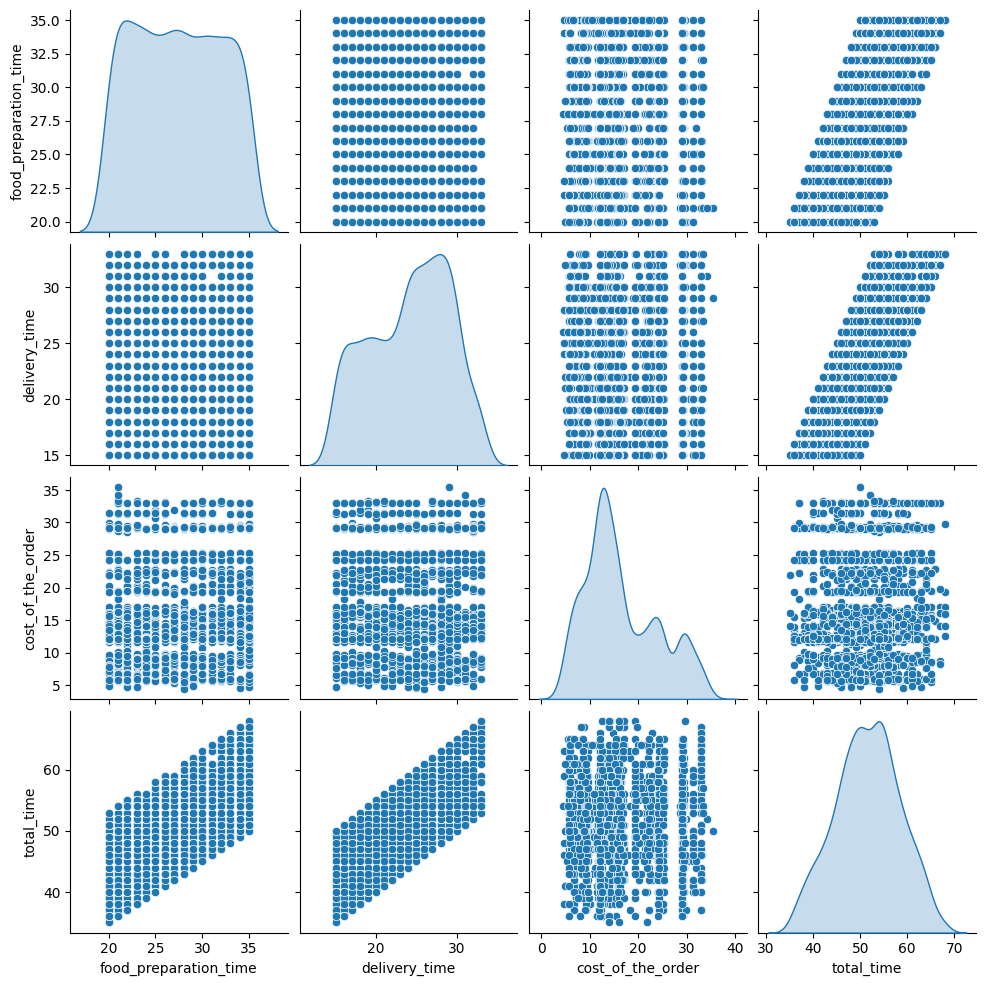

In [ ]:

sns.pairplot(data=df[num_cols], diag_kind="kde")
plt.show()

Observation:

There are no real correlation with the numerical columns. The total_time obviously will have correlation with the delivery time and prep time as it is a sum of those two columns. Cost of the Order is not impacted by the delivery time, prep time or the total time.

In [ ]:
# lets check the correlation between Total Time and cost of the order
df[['total_time','cost_of_the_order']].corr()

,total_time,cost_of_the_order
total_time,1.000000,0.006358
cost_of_the_order,0.006358,1.000000


Observation:

As we saw earlier there are no correlation between these two columns.

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


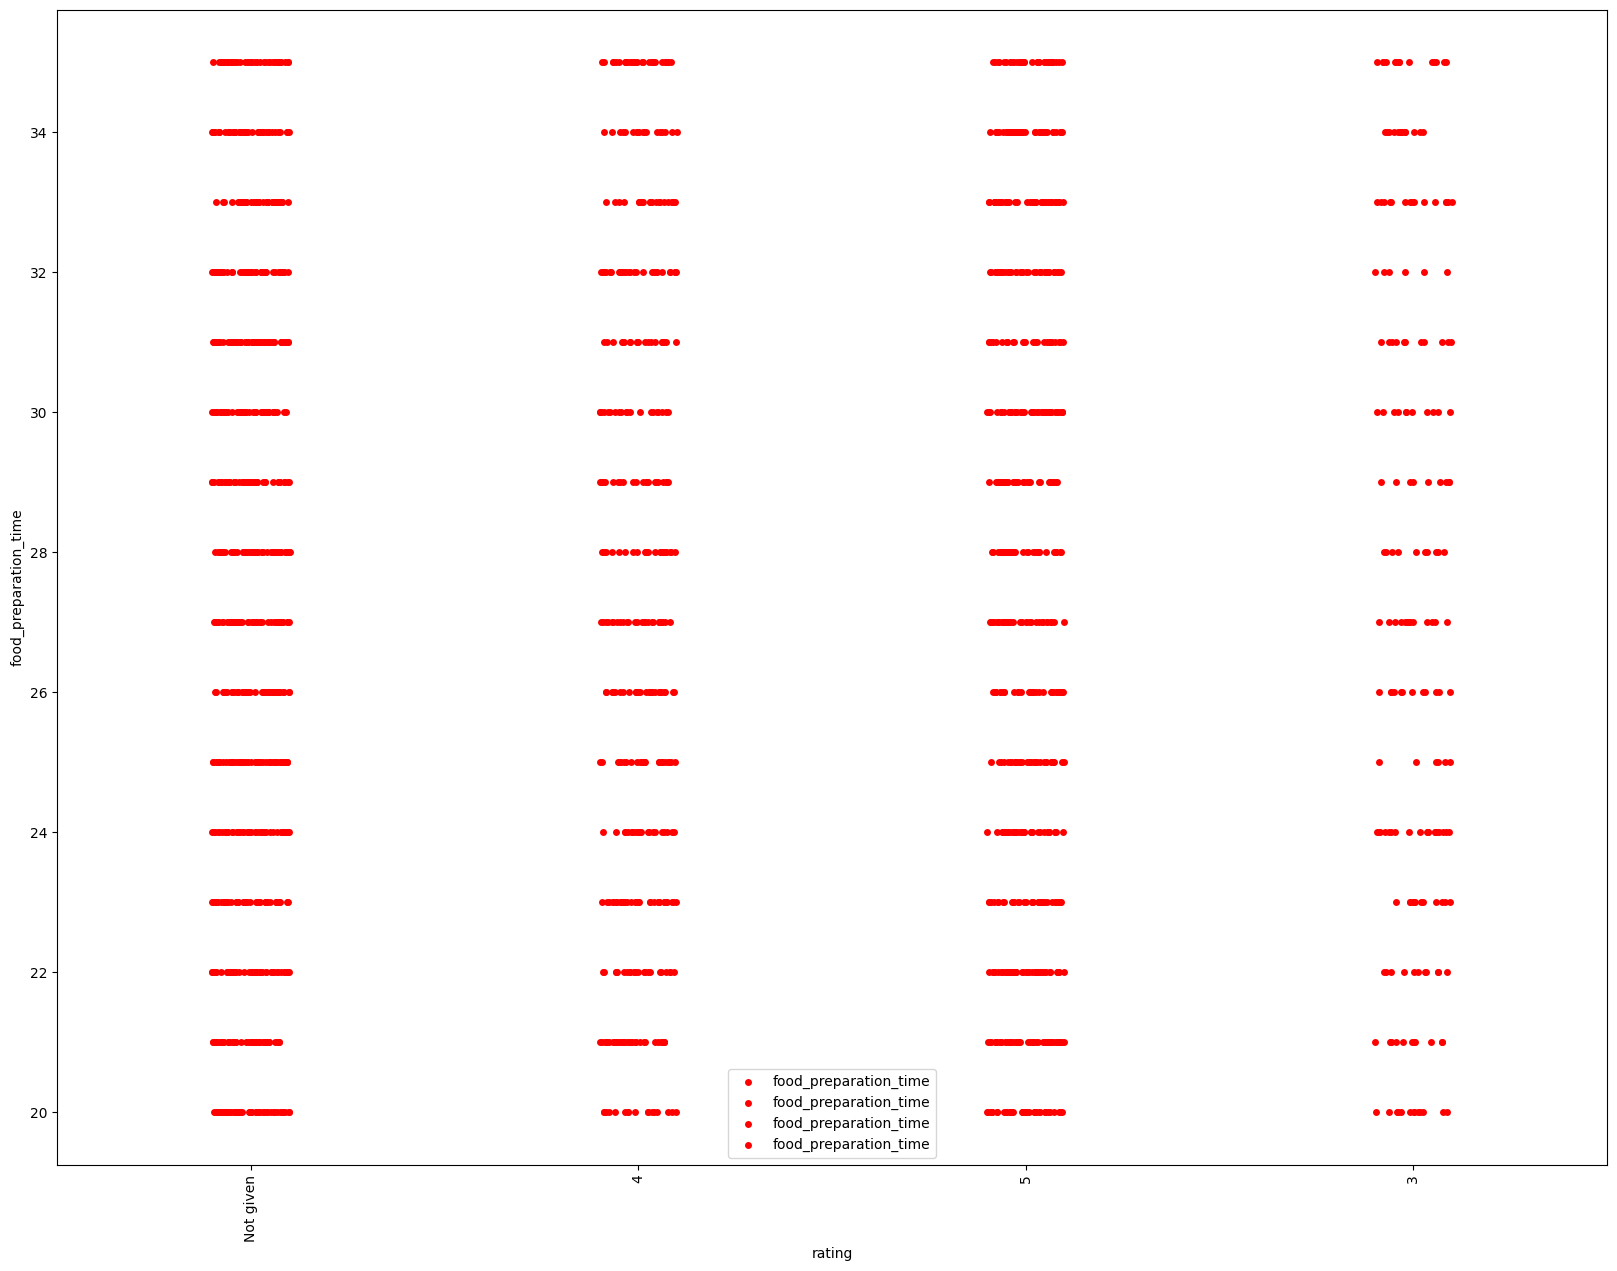

In [ ]:
plt.figure(figsize = (20,15)) # To resize the plot
# Plot stocks per state
sns.stripplot(x="rating", y="food_preparation_time", data=df.sort_values("food_preparation_time", ascending=False),
            label="food_preparation_time", color="r", jitter=True)

plt.xticks(rotation=90);

## Observation

* Food Preparation Time does not matter whether they give a rating or not.
* None of the orders received ratings 1 or 2

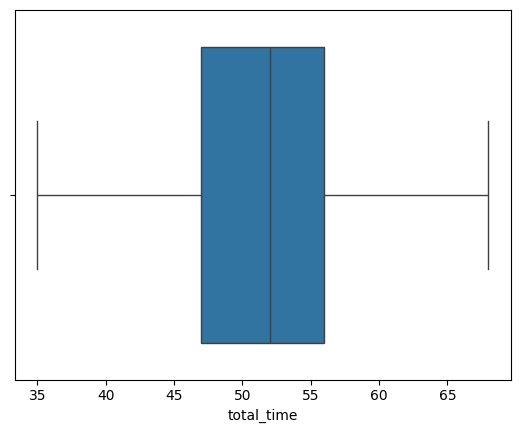

In [ ]:
#Box Plot for the total time.
sns.boxplot(data=df,x='total_time')
plt.show()

Observation:

Even for the Total Time that was calculated by adding the delivery time and prep time, there are no outliers. There is only a slight skew in the data.

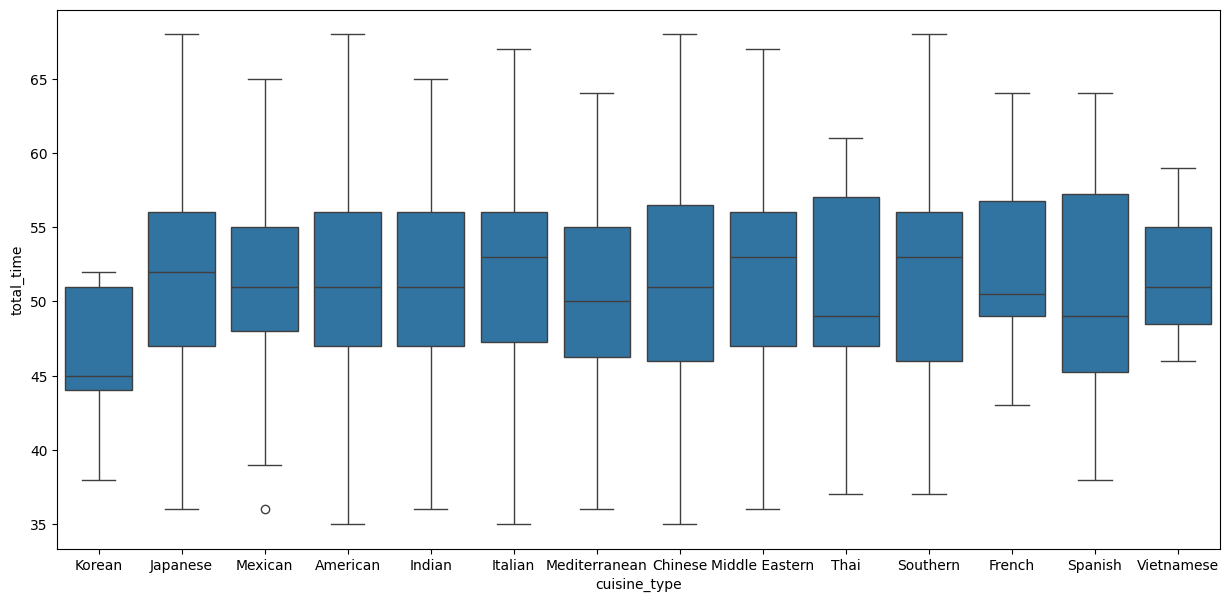

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'], y=df['total_time'])
plt.ylabel('total_time')
plt.xlabel('cuisine_type')
plt.show()

Observation:
*   There are no outliers even when we check the data at every cusine type.
*   Korean Cusine seems to be the quickest to complete delivery.



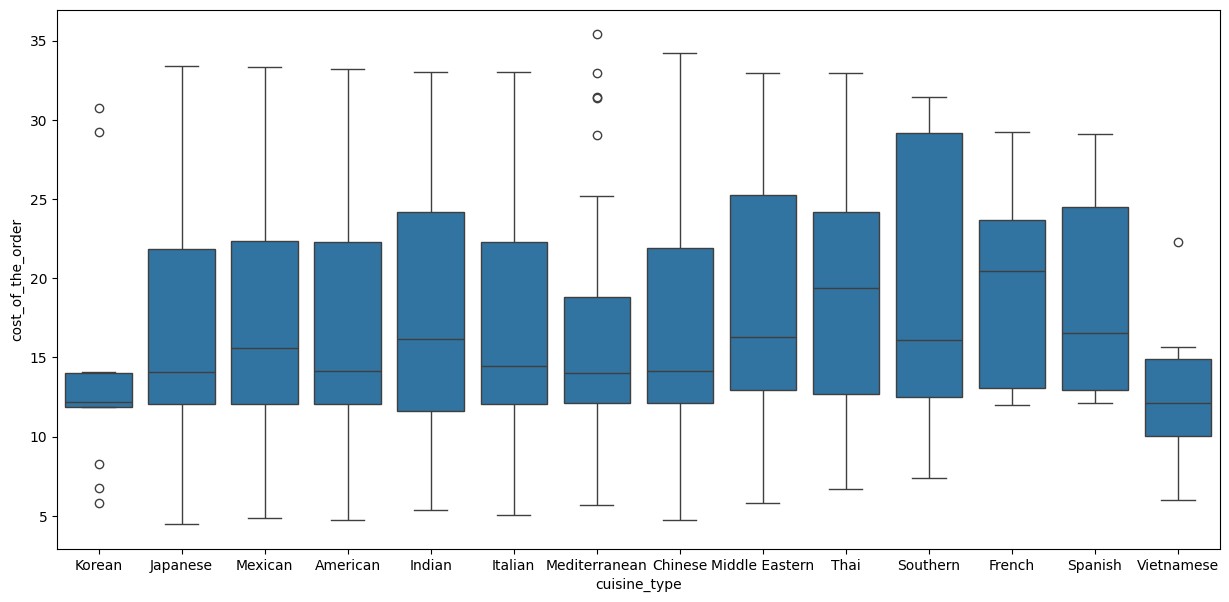

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'], y=df['cost_of_the_order'])
plt.ylabel('cost_of_the_order')
plt.xlabel('cuisine_type')
plt.show()

Observation:
*   on cost of the orders for each cusine, there are some outliers. The outliers are there for Korean, Mediterranean and vietnamese cusines.
*   50% cost of the order for Southern cusines are greater than $15.

*   Vietnamese cusine, almost all the orders cost less than $14.



In [ ]:
#adding another column to indicate whether rating has been given or not.
df['rating_flag'] = 0

In [ ]:
# Looping the df and updating the flag, indicating whether there is a rating for that particular record.
for ind in df.index:
  if df['rating'][ind] in ['1','2','3','4','5']:
    df['rating_flag'][ind] = 1
  else:
    df['rating_flag'][ind] = 0

In [ ]:
#Create a data set based on the the rating given.
rating_given = df.loc[df['rating_flag']==1,'restaurant_name'].value_counts()
rating_given.head(10)



restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
Parm                          39
RedFarm Hudson                34
TAO                           28
Rubirosa                      24
Nobu Next Door                23
Name: count, dtype: int64

In [ ]:
# Create a data set based on the the rating given.
#rating_given = df.loc[df['rating_flag']==1,'restaurant_name'].value_counts()
#rating_given.head(10)

rest_rating = df.groupby('restaurant_name')['rating_flag'].agg(['sum'])
rest_rating = rest_rating.sort_values(by=['sum'], ascending=False)
rest_rating.head(5)

,sum
restaurant_name,
Shake Shack,133
The Meatball Shop,84
Blue Ribbon Sushi,73
Blue Ribbon Fried Chicken,64
RedFarm Broadway,41


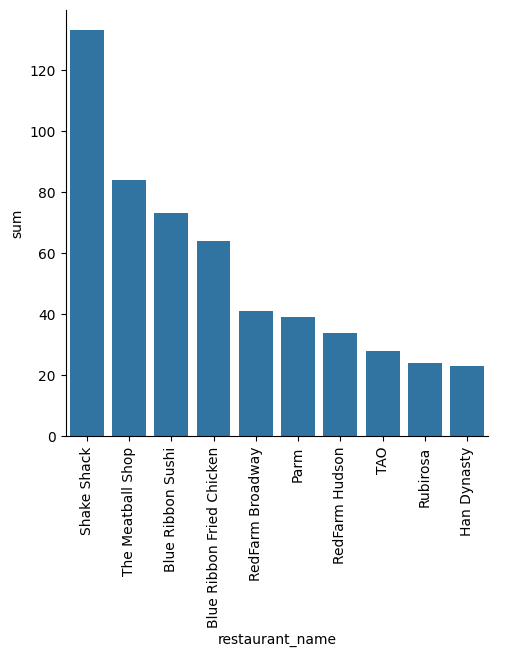

In [ ]:
sns.catplot(x='restaurant_name', y='sum', data=rest_rating.head(10), kind="bar")
plt.xticks(rotation=90)
plt.show()

**Observations:**
*   Shake Shack has the most rating among all restaurants with 133 rated orders
*   Top 5 restaurants which has the most ratings are Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken.
*   To make it clear these are not top rated restaurants, these have the most number of ratings recorded.







In [ ]:
#Create a data set based on the the rating not given.
rating_given = df.loc[df['rating_flag']==0,'restaurant_name'].value_counts()
rating_given.head(10)

restaurant_name
Shake Shack                      86
The Meatball Shop                48
Blue Ribbon Sushi                46
Blue Ribbon Fried Chicken        32
Parm                             29
Han Dynasty                      23
Blue Ribbon Sushi Bar & Grill    22
RedFarm Hudson                   21
TAO                              21
Sushi of Gari 46                 20
Name: count, dtype: int64

**Observation:**

*   Shake and Shack again tops the list, for the most not rated orders.


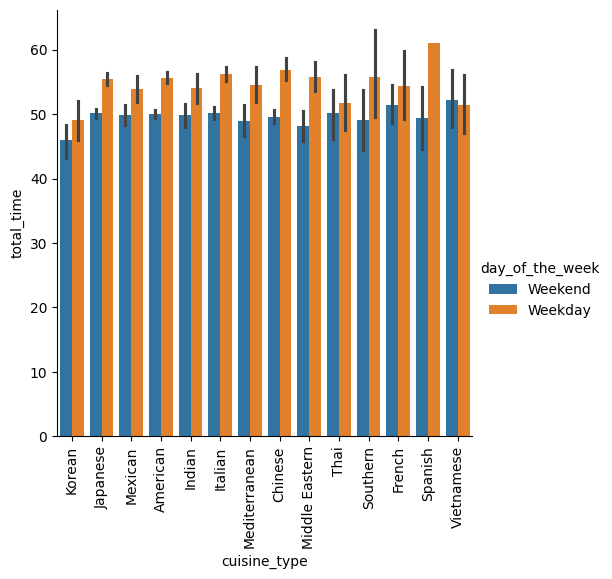

In [ ]:
# Total Time taken to deliver the food from the time of order in each cusine during weekends and weekdays.
#catplot
sns.catplot(x='cuisine_type', y='total_time', data=df, kind="bar", hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

**Observation**
During Weekdays Spanish Cusine takes on average more time than any other cusine.
On Average almost all deliveries takes less than 60 minutes from the time the food was ordered.


<Figure size 4000x4000 with 0 Axes>

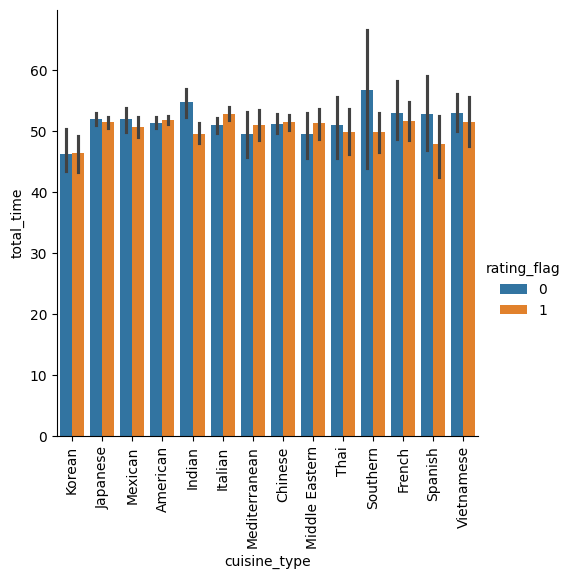

In [ ]:
plt.figure(figsize=(40,40))
sns.catplot(x='cuisine_type', y='total_time', data=df, kind="bar", hue='rating_flag')
plt.xticks(rotation=90)
plt.show()

**Observation**

* Korean Cusine has the lowest number of rated and unrated orders.
* French Cusine has the higest number of rated orders.
* Some cusines has more unrated orders than rated orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Find all the restaurants that have more than 50 ratings.
rest_rating.loc[rest_rating['sum'] > 50,'sum']

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: sum, dtype: int64

In [ ]:

df['ratingnum'] = 0
# Looping the df and updating the flag, indicating whether there is a rating for that particular record.
for ind in df.index:
  if df['rating'][ind] in ['1']:
    df['ratingnum'][ind] = 1
  elif df['rating'][ind] in ['2']:
    df['ratingnum'][ind] = 2
  elif df['rating'][ind] in ['3']:
    df['ratingnum'][ind] = 3
  elif df['rating'][ind] in ['4']:
    df['ratingnum'][ind] = 4
  elif df['rating'][ind] in ['5']:
    df['ratingnum'][ind] = 5






In [ ]:
#Finding the Mean Rating for each rest
dfmean = df.groupby('restaurant_name')['ratingnum'].mean(['ratingnum'])
dfmean = dfmean.reset_index()
dfmean = dfmean.sort_values(by=['ratingnum'], ascending=False)

In [ ]:
#Filtering the dataset where the rating is greater than 4.
#Checking whether those restaurants has over 50 reviews.
dfwithratingover4 = dfmean[(dfmean['ratingnum'] > 4)]
dfwithratingover4.head(10)
dfwithratingover4 = dfwithratingover4[dfwithratingover4["restaurant_name"].isin(['Shake Shack','Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken'])]
dfwithratingover4.head(10)





,restaurant_name,ratingnum


**Observation:**

*   These restaurants have more than 50 reviews.
    Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken.

*   There are no restaurants that has over 50 reviews and average ratings over 4.





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
ordermorethan20 = df.loc[df['cost_of_the_order']>20].sum()
orderbtw5and20 = df.loc[(df['cost_of_the_order'] <=20 ) & (df['cost_of_the_order'] >= 5), 'cost_of_the_order'].sum()
revenue = ordermorethan20['cost_of_the_order'] * .25
revenue = revenue + orderbtw5and20 * .15
print(revenue)




6166.303


#### Observations:
*   6166.303 is the revenue generated by the company across all orders.





### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#Total is already available in the dataset
#created to do exploratory data analysis
#using the same column value to the find the total number of orders which takes more than 60 minutes.
counttotalTimeTaken = df.loc[(df['total_time'] > 60 )].count()
counttotalTimeTaken
totalorders = df['total_time'].count()
print(totalorders)
percentofordersgreater60 = (counttotalTimeTaken['total_time']/totalorders)*100
percentofordersgreater60


1898


10.537407797681771

#### Observations:

10.5 percent of the orders take more than 60 minutes.
200 out of 1898 orders take more than 60 minutes.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,rating_flag,ratingnum
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,0,0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48,0,0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,1,5


In [ ]:
# Write the code here
df.head(5)
Meandeliverytime = df.groupby('day_of_the_week')['delivery_time'].mean()
Meandeliverytime


#meanWeekDay

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:

During weekdays it takes on average 28 minutes to deliver and during weekend it takes on average 22 minutes to deliver.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*  We can conclude that the total time taken to deliver food to a
customer is almost less than 60 minutes. Not many customers have rating each order.
* There are more than twice the orders during the weekends compared to weekdays. So the company has to employ more number of drivers to make sure food is delivered on time.
* American Cuisine is the most popular cuisine during the weekends and Shake Shack restaurants has the most orders in the dataset.
* On Average the cost of the order is less than 17 dollars.

### Recommendations:

*  Have a better plan in place get more ratings for each order.
*  Manage your weekend drivers and deliveries to make sure you are able accomodate the increase in demand compared to the weekdays.
* Work with the restaurants to provide more specific promotions during the weekdays to increase your orders.




---